In [1]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 14.9 MB/s 


# **Import Library**

In [2]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score as f1
from sklearn .metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Aspek Desain**

In [4]:
tweet_desain = pd.read_csv('/content/drive/MyDrive/Dataset TA/aspek_desain.csv')
tweet_desain.shape

(5000, 3)

In [5]:
tweet_desain['label'].value_counts()

 1    3701
 0    1249
-1      50
Name: label, dtype: int64

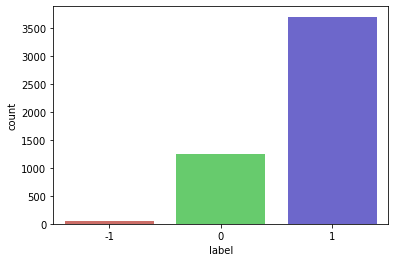

In [6]:
desain = sns.countplot(tweet_desain['label'], palette = 'hls')
plt.show()

In [7]:
tweet_desain.isna().sum()

tweet       0
stemming    0
label       0
dtype: int64

## Inisialisasi Data

In [8]:
x_desain = tweet_desain['stemming']
y_desain = tweet_desain['label'].values

## Split Data



In [9]:
from sklearn.model_selection import train_test_split
x_desain_train, x_desain_test, y_desain_train, y_desain_test = train_test_split(
    tweet_desain['stemming'], 
    tweet_desain['label'], 
    test_size=0.2)

train_df = pd.DataFrame()
train_df['tweet'] = x_desain_train
train_df['sentiment'] = y_desain_train
test_df = pd.DataFrame()
test_df['tweet'] = x_desain_test
test_df['sentiment'] = y_desain_test

## Feature TF-IDF

In [10]:
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_desain_train)
x_desain_train_vectorized = tfidf_vect.transform(x_desain_train)
x_desain_test_vectorized = tfidf_vect.transform(x_desain_test)

In [11]:
print (x_desain_train_vectorized)

  (0, 2752)	0.23710317009339063
  (0, 2497)	0.043564337465794745
  (0, 2329)	0.2551597358319975
  (0, 1945)	0.17396478397884999
  (0, 1895)	0.2551597358319975
  (0, 1546)	0.0435414537734387
  (0, 1534)	0.10035213820946358
  (0, 1316)	0.22899425752668828
  (0, 1270)	0.0506528833558687
  (0, 1119)	0.09791736058400341
  (0, 996)	0.1341782190595939
  (0, 990)	0.04365603487705145
  (0, 902)	0.4132583344468389
  (0, 727)	0.33664814683532174
  (0, 681)	0.20662916722341945
  (0, 599)	0.07147291828954798
  (0, 540)	0.23710317009339063
  (0, 533)	0.27752482613526636
  (0, 301)	0.11854203473642756
  (0, 161)	0.043008306741485244
  (0, 80)	0.2644420869826118
  (0, 75)	0.2881990437579534
  (0, 8)	0.22559469461541354
  (1, 2497)	0.14361677569481798
  (1, 1945)	0.2867513063765146
  :	:
  (3997, 75)	0.25122890727842573
  (3998, 2497)	0.11641945358627417
  (3998, 2100)	0.37052184548049866
  (3998, 1945)	0.23244798695692118
  (3998, 1546)	0.11635830019533328
  (3998, 1534)	0.26817671921977626
  (3998, 1

## Klasifikasi SVM Dengan Cross Validation

* Cross Validation Using Linear Kernel

In [12]:
### create model
clf_linear = SVC(kernel='linear')
### cross-validation evaluation
cv_linear = cross_val_score(clf_linear, x_desain_train_vectorized, y_desain_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))


Accuracy Score Linear of : 0.9682


* Cross Validation Using Polynomial Kernel

In [13]:
### create model
clf_poly = SVC(kernel='poly')
### cross-validation evaluation
cv_poly = cross_val_score(clf_poly, x_desain_train_vectorized, y_desain_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score Poly of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly of : 0.8890


* Cross Validation with default RBF Kernel

In [14]:
### create model
clf_rbf = SVC(kernel='rbf')
### cross-validation evaluation
cv_rbf= cross_val_score(clf_rbf, x_desain_train_vectorized, y_desain_train, scoring='accuracy', cv=5)
### Show CV result
print("Accuracy Score RBF of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF of : 0.9645


## Tuning Parameter with GridSearchCV

* Linear Kernel

In [15]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['linear']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_desain_train_vectorized, y_desain_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.750 total time=   1.2s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.750 total time=   1.2s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.750 total time=   1.2s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.749 total time=   1.1s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.749 total time=   1.2s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.941 total time=   0.8s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.943 total time=   0.7s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.948 total time=   0.8s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.955 total time=   0.9s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.954 total time=   0.5s
[CV 1/5] END ................C=1, kernel=linear;, score=0.966 total time=   0.3s
[CV 2/5] END ................C=1, kernel=linear;,

* Polynomial Kernel

In [16]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['poly'],
              'degree':[1, 2, 3, 4, 5, 6],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_desain_train_vectorized, y_desain_train)


selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)
selected_degree_poly = grid.best_params_['degree']
print("Selected Degree: ", selected_degree_poly)

best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.750 total time=   0.5s
[CV 2/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.750 total time=   0.5s
[CV 3/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.750 total time=   0.5s
[CV 4/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.749 total time=   0.5s
[CV 5/5] END C=0.001, degree=1, gamma=auto, kernel=poly;, score=0.749 total time=   0.5s
[CV 1/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.750 total time=   0.7s
[CV 2/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.750 total time=   0.7s
[CV 3/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.750 total time=   0.7s
[CV 4/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.749 total time=   0.7s
[CV 5/5] END C=0.001, degree=1, gamma=scale, kernel=poly;, score=0.749 total time=   0.7s
[CV 1/5] END C=0.001, degree=2, gamma=auto,

* RBF Kernel

In [17]:
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000],
              'kernel': ['rbf'],
              'gamma' :['auto', 'scale']
             }
 
grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3) 
# fitting the model for grid search
grid.fit(x_desain_train_vectorized, y_desain_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.750 total time=   0.6s
[CV 2/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.750 total time=   0.6s
[CV 3/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.750 total time=   0.6s
[CV 4/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.749 total time=   0.6s
[CV 5/5] END ...C=0.001, gamma=auto, kernel=rbf;, score=0.749 total time=   0.6s
[CV 1/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.750 total time=   0.8s
[CV 2/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.750 total time=   0.8s
[CV 3/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.750 total time=   0.8s
[CV 4/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.749 total time=   0.8s
[CV 5/5] END ..C=0.001, gamma=scale, kernel=rbf;, score=0.749 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.750 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;

## CV with Tuned Hyperparamater

In [26]:
cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_desain_train_vectorized, y_desain_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear : %0.4f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_desain_train_vectorized, y_desain_train, scoring='accuracy', cv=5)
print("Accuracy Score poly : %0.4f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_desain_train_vectorized, y_desain_train, scoring='accuracy', cv=5)
print("Accuracy Score rbf : %0.4f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear : 0.9703 0.0032977264895682
Accuracy Score poly : 0.9703 0.0032977264895682
Accuracy Score rbf : 0.9688 0.001767766952966331


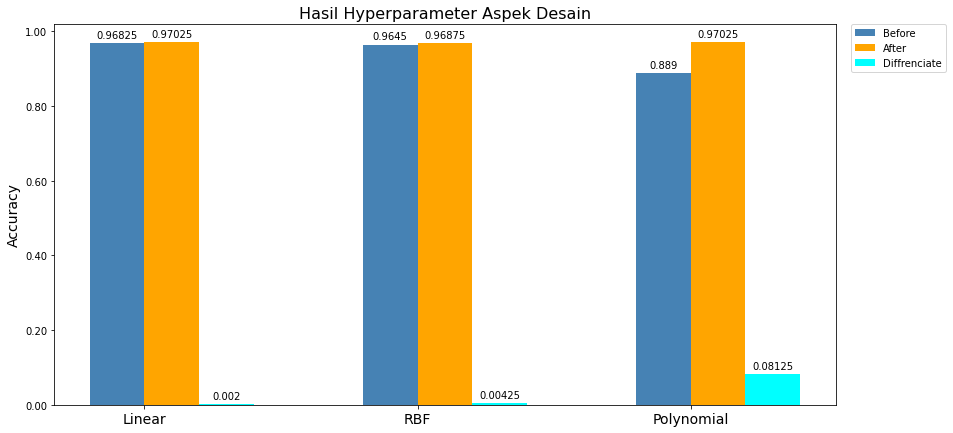

In [19]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Aspek Desain', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)
    
plt.show()

## Model Validation

### Model Validation Hyperparameter Tuning Test Dataset

* Linear Kernel

In [20]:
grid_predictions = model_looks_linear_HT.predict(x_desain_test_vectorized)

print("F1-SCORE ",f1(y_desain_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_desain_test,grid_predictions) * 100)
print("PRECISION ",prec(y_desain_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_desain_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_desain_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_desain_test, grid_predictions))

F1-SCORE  84.79493514339931
ACCURACY  96.8
PRECISION  97.4683874714708
RECALL 79.24470523154733
Confusion Matrix : 
 [[  4   2   3]
 [  0 274  14]
 [  0  13 690]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.44      0.62         9
           0       0.95      0.95      0.95       288
           1       0.98      0.98      0.98       703

    accuracy                           0.97      1000
   macro avg       0.97      0.79      0.85      1000
weighted avg       0.97      0.97      0.97      1000



* Poly Kernel

In [21]:
grid_predictions = model_looks_poly_HT.predict(x_desain_test_vectorized)

print("F1-SCORE ",f1(y_desain_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_desain_test,grid_predictions) * 100)
print("PRECISION ",prec(y_desain_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_desain_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_desain_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_desain_test, grid_predictions))

F1-SCORE  84.79493514339931
ACCURACY  96.8
PRECISION  97.4683874714708
RECALL 79.24470523154733
Confusion Matrix : 
 [[  4   2   3]
 [  0 274  14]
 [  0  13 690]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.44      0.62         9
           0       0.95      0.95      0.95       288
           1       0.98      0.98      0.98       703

    accuracy                           0.97      1000
   macro avg       0.97      0.79      0.85      1000
weighted avg       0.97      0.97      0.97      1000



* RBF Kernel

In [22]:
grid_predictions = model_looks_rbf_HT.predict(x_desain_test_vectorized)

print("F1-SCORE ",f1(y_desain_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_desain_test,grid_predictions) * 100)
print("PRECISION ",prec(y_desain_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_desain_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_desain_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_desain_test, grid_predictions))

F1-SCORE  76.55367725159662
ACCURACY  96.89999999999999
PRECISION  97.30329178651326
RECALL 72.32116985406459
Confusion Matrix : 
 [[  2   4   3]
 [  0 279   9]
 [  0  15 688]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.22      0.36         9
           0       0.94      0.97      0.95       288
           1       0.98      0.98      0.98       703

    accuracy                           0.97      1000
   macro avg       0.97      0.72      0.77      1000
weighted avg       0.97      0.97      0.97      1000



### Model Validation Hyperparameter Tuning Train Dataset

* Linear Kernel

In [23]:
grid_predictions = model_looks_linear_HT.predict(x_desain_train_vectorized)

print("F1-SCORE ",f1(y_desain_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_desain_train,grid_predictions) * 100)
print("PRECISION ",prec(y_desain_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_desain_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_desain_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_desain_train, grid_predictions))

F1-SCORE  99.56002481610065
ACCURACY  99.95
PRECISION  99.95423144188989
RECALL 99.17587334645862
Confusion Matrix : 
 [[  40    0    1]
 [   0  961    0]
 [   0    1 2997]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.98      0.99        41
           0       1.00      1.00      1.00       961
           1       1.00      1.00      1.00      2998

    accuracy                           1.00      4000
   macro avg       1.00      0.99      1.00      4000
weighted avg       1.00      1.00      1.00      4000



* Poly Kernel

In [24]:
grid_predictions = model_looks_poly_HT.predict(x_desain_train_vectorized)

print("F1-SCORE ",f1(y_desain_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_desain_train,grid_predictions) * 100)
print("PRECISION ",prec(y_desain_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_desain_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_desain_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_desain_train, grid_predictions))

F1-SCORE  99.56002481610065
ACCURACY  99.95
PRECISION  99.95423144188989
RECALL 99.17587334645862
Confusion Matrix : 
 [[  40    0    1]
 [   0  961    0]
 [   0    1 2997]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      0.98      0.99        41
           0       1.00      1.00      1.00       961
           1       1.00      1.00      1.00      2998

    accuracy                           1.00      4000
   macro avg       1.00      0.99      1.00      4000
weighted avg       1.00      1.00      1.00      4000



* RBF Kernel

In [25]:
grid_predictions = model_looks_rbf_HT.predict(x_desain_train_vectorized)

print("F1-SCORE ",f1(y_desain_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_desain_train,grid_predictions) * 100)
print("PRECISION ",prec(y_desain_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_desain_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_desain_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_desain_train, grid_predictions))

F1-SCORE  100.0
ACCURACY  100.0
PRECISION  100.0
RECALL 100.0
Confusion Matrix : 
 [[  41    0    0]
 [   0  961    0]
 [   0    0 2998]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        41
           0       1.00      1.00      1.00       961
           1       1.00      1.00      1.00      2998

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

